In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import h2o

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.231-b11, mixed mode)


C:\MachineLearning\anaconda3\envs\tf2-gpu\lib\site-packages\h2o\backend\server.py:385: UserWarning:   You have a 32-bit version of Java. H2O works best with 64-bit Java.
  Please download the latest 64-bit Java SE JDK from Oracle.

  warn("  You have a 32-bit version of Java. H2O works best with 64-bit Java.\n"


  Starting server from C:\MachineLearning\anaconda3\envs\tf2-gpu\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\ADITYA~1\AppData\Local\Temp\tmpm0kbawf_
  JVM stdout: C:\Users\ADITYA~1\AppData\Local\Temp\tmpm0kbawf_\h2o_Aditya_Jain_started_from_python.out
  JVM stderr: C:\Users\ADITYA~1\AppData\Local\Temp\tmpm0kbawf_\h2o_Aditya_Jain_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,25 days
H2O_cluster_name:,H2O_from_python_Aditya_Jain_6ll3dw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,247.5 Mb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"accepting new members, healthy"


In [3]:
data = h2o.import_file('allyears2k_headers.csv',
                      destination_frame='airlines')

train, valid, test = data.split_frame([0.8,0.1], seed=100)
print ('Number of rows train (%d), validation (%d) and test (%d)'%(train.nrows, valid.nrows, test.nrows))

Parse progress: |█████████████████████████████████████████████████████████| 100%
Number of rows train (35257), validation (4270) and test (4451)


In [4]:
#what we want to predict
y = 'IsArrDelayed'

#fields which we may not have while doing prediction.
ignoreFields = ["DepDelay",
                "ArrDelay",
                "CarrierDelay",
                "WeatherDelay",
                "NASDelay",
                "SecurityDelay",
                "LateAircraftDelay",
                "IsDepDelayed",
                "IsArrDelayed",
                "ActualElapsedTime"]

#all fields minus those which we would not have during predictions
xAll = [i for i in train.names if i not in ignoreFields]

#all fields which we would have during prediction
xLikely = ["Month",
          "DayOfWeek",
          "UniqueCarrier",
          "Origin",
          "Dest",
          "Distance",
          "Cancelled",
          "Diverted"]

### Baseline Model

In [47]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

estimator = H2ODeepLearningEstimator(variable_importances=True) #variable_importance gives feature importance (explainability)
estimator.train(xAll,y,train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [48]:
perf = estimator.model_performance(test)
print (perf.logloss)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.09663273640390971
RMSE: 0.3108580647239343
LogLoss: 0.2988499557477456
Mean Per-Class Error: 0.13771561738308158
AUC: 0.9441680389007997
AUCPR: 0.9569968298117338
Gini: 0.8883360778015994

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.47757348855744175: 


,,NO,YES,Error,Rate
0,NO,1613.0,398.0,0.1979,(398.0/2011.0)
1,YES,238.0,2202.0,0.0975,(238.0/2440.0)
2,Total,1851.0,2600.0,0.1429,(636.0/4451.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.477573,0.873810,216.0
1,max f2,0.176870,0.920344,318.0
2,max f0point5,0.766896,0.900835,115.0
3,max accuracy,0.602744,0.860256,173.0
4,max precision,0.999956,1.000000,0.0
5,max recall,0.008087,1.000000,390.0
6,max specificity,0.999956,1.000000,0.0
7,max absolute_mcc,0.692403,0.721704,142.0
8,max min_per_class_accuracy,0.584898,0.858607,179.0
9,max mean_per_class_accuracy,0.692403,0.862284,142.0



Gains/Lift Table: Avg response rate: 54.82 %, avg score: 56.82 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010110,1.000000e+00,1.824180,1.824180,1.000000,1.000000,1.000000,1.000000,0.018443,0.018443,82.418033,82.418033
1,,2,0.020220,1.000000e+00,1.824180,1.824180,1.000000,1.000000,1.000000,1.000000,0.018443,0.036885,82.418033,82.418033
2,,3,0.030106,9.999998e-01,1.824180,1.824180,1.000000,1.000000,1.000000,1.000000,0.018033,0.054918,82.418033,82.418033
3,,4,0.040216,9.999856e-01,1.824180,1.824180,1.000000,0.999996,1.000000,0.999999,0.018443,0.073361,82.418033,82.418033
4,,5,0.050101,9.999258e-01,1.824180,1.824180,1.000000,0.999959,1.000000,0.999991,0.018033,0.091393,82.418033,82.418033
5,,6,0.100202,9.990596e-01,1.824180,1.824180,1.000000,0.999538,1.000000,0.999764,0.091393,0.182787,82.418033,82.418033
6,,7,0.150079,9.966001e-01,1.824180,1.824180,1.000000,0.998015,1.000000,0.999183,0.090984,0.273770,82.418033,82.418033
7,,8,0.200180,9.916637e-01,1.824180,1.824180,1.000000,0.994506,1.000000,0.998012,0.091393,0.365164,82.418033,82.418033
8,,9,0.300157,9.557419e-01,1.774989,1.807795,0.973034,0.978513,0.991018,0.991517,0.177459,0.542623,77.498895,80.779547
9,,10,0.400135,8.413827e-01,1.619216,1.760677,0.887640,0.906330,0.965188,0.970232,0.161885,0.704508,61.921625,76.067714



<bound method MetricsBase.logloss of >


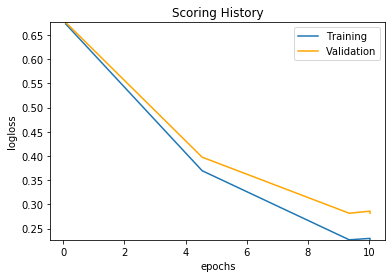

In [49]:
estimator.plot()

In [50]:
# see scoring history - tabular form of above plot
estimator.scoring_history()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-04-30 00:48:56,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-04-30 00:51:09,4 min 3.782 sec,206 obs/sec,0.075900,1,2676.0,0.490199,0.672934,0.024298,...,0.752652,1.782538,0.407667,0.491487,0.676141,0.024142,0.671383,0.733579,1.819344,0.424122
2,,2020-04-30 00:52:29,5 min 23.742 sec,1892 obs/sec,4.544232,60,160216.0,0.347016,0.369478,0.511042,...,0.952380,1.782538,0.142582,0.358321,0.397499,0.481311,0.920266,0.939943,1.819344,0.168618
3,,2020-04-30 00:53:51,6 min 46.473 sec,2077 obs/sec,9.358510,124,329953.0,0.265984,0.226748,0.712735,...,0.977577,1.782538,0.099077,0.299600,0.281630,0.637384,0.951052,0.961711,1.819344,0.126230
4,,2020-04-30 00:54:12,7 min 6.643 sec,2072 obs/sec,10.038914,133,353942.0,0.268092,0.229663,0.708164,...,0.976517,1.782538,0.102018,0.301006,0.285911,0.633972,0.949132,0.961662,1.819344,0.135129
5,,2020-04-30 00:54:21,7 min 15.496 sec,2064 obs/sec,10.038914,133,353942.0,0.265984,0.226748,0.712735,...,0.977577,1.782538,0.099077,0.299600,0.281630,0.637384,0.951052,0.961711,1.819344,0.126230


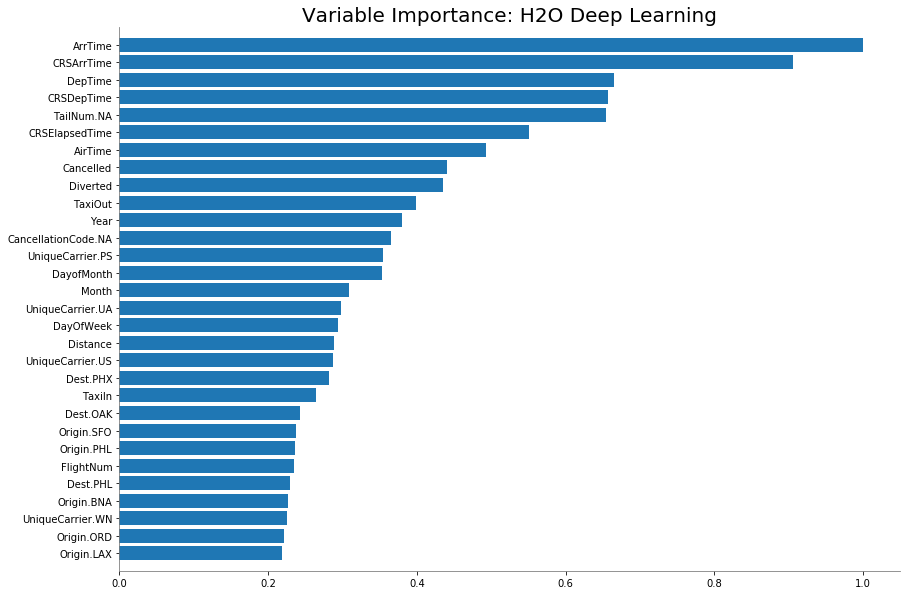

In [51]:
# see feature importance
estimator.varimp_plot(30)

In [52]:
# structure of model
estimator_50epochs.summary()


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 801,202 weights/biases, 9.2 MB, 1,764,740 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3802,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.542745,0.476419,0,0.000179051,0.025628,-0.359573,0.247238
2,,3,200,Rectifier,0,0,0,0.286142,0.365582,0,-0.00476971,0.093497,-0.0384728,0.258206
3,,4,2,Softmax,,0,0,0.0240927,0.0901797,0,0.015626,0.32591,0.0129414,0.215479


### Fine Tune 1 - Increase Epochs & Specify default Early Stopping values

In [9]:
estimator_50epochs = H2ODeepLearningEstimator(
    epochs = 50,
    stopping_rounds = 5,
    stopping_tolerance = 0,
    stopping_metric = 'logloss')
estimator_50epochs.train(xAll,y,train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [10]:
perf_50epochs = estimator_50epochs.model_performance(test)
print (perf_50epochs.logloss)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.09627654182849972
RMSE: 0.310284614231031
LogLoss: 0.30340524334155544
Mean Per-Class Error: 0.12648598690807122
AUC: 0.952466556887936
AUCPR: 0.9636297461394048
Gini: 0.904933113775872

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2459289095671368: 


,,NO,YES,Error,Rate
0,NO,1693.0,318.0,0.1581,(318.0/2011.0)
1,YES,242.0,2198.0,0.0992,(242.0/2440.0)
2,Total,1935.0,2516.0,0.1258,(560.0/4451.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.245929,0.887006,269.0
1,max f2,0.057616,0.923542,357.0
2,max f0point5,0.632212,0.909887,146.0
3,max accuracy,0.245929,0.874186,269.0
4,max precision,0.999968,1.000000,0.0
5,max recall,0.001592,1.000000,397.0
6,max specificity,0.999968,1.000000,0.0
7,max absolute_mcc,0.320189,0.745742,243.0
8,max min_per_class_accuracy,0.326151,0.871706,241.0
9,max mean_per_class_accuracy,0.320189,0.873514,243.0



Gains/Lift Table: Avg response rate: 54.82 %, avg score: 49.06 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.016401,1.000000e+00,1.824180,1.824180,1.000000,1.000000,1.000000,1.000000,0.029918,0.029918,82.418033,82.418033
1,,2,0.020220,1.000000e+00,1.824180,1.824180,1.000000,1.000000,1.000000,1.000000,0.006967,0.036885,82.418033,82.418033
2,,3,0.030106,1.000000e+00,1.824180,1.824180,1.000000,1.000000,1.000000,1.000000,0.018033,0.054918,82.418033,82.418033
3,,4,0.040216,1.000000e+00,1.824180,1.824180,1.000000,1.000000,1.000000,1.000000,0.018443,0.073361,82.418033,82.418033
4,,5,0.050101,9.999998e-01,1.824180,1.824180,1.000000,1.000000,1.000000,1.000000,0.018033,0.091393,82.418033,82.418033
5,,6,0.100202,9.999632e-01,1.824180,1.824180,1.000000,0.999990,1.000000,0.999995,0.091393,0.182787,82.418033,82.418033
6,,7,0.150079,9.994726e-01,1.824180,1.824180,1.000000,0.999774,1.000000,0.999921,0.090984,0.273770,82.418033,82.418033
7,,8,0.200180,9.976904e-01,1.824180,1.824180,1.000000,0.998704,1.000000,0.999617,0.091393,0.365164,82.418033,82.418033
8,,9,0.300157,9.680835e-01,1.795485,1.814622,0.984270,0.987123,0.994760,0.995455,0.179508,0.544672,79.548536,81.462250
9,,10,0.400135,7.550580e-01,1.639713,1.770920,0.898876,0.884858,0.970803,0.967822,0.163934,0.708607,63.971265,77.091959



<bound method MetricsBase.logloss of >


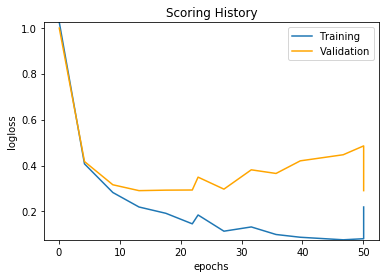

In [11]:
estimator_50epochs.plot()

In [12]:
# structure of model
estimator_50epochs.summary()


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 801,202 weights/biases, 9.2 MB, 1,764,740 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3802,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.542745,0.476419,0,0.000179051,0.025628,-0.359573,0.247238
2,,3,200,Rectifier,0,0,0,0.286142,0.365582,0,-0.00476971,0.093497,-0.0384728,0.258206
3,,4,2,Softmax,,0,0,0.0240927,0.0901797,0,0.015626,0.32591,0.0129414,0.215479


In [25]:
### Fine Tune 2 - Reduce Epochs to 12 & Specify small Early Stopping values

In [15]:
estimator_12epochs = H2ODeepLearningEstimator(
    epochs = 12,
    hidden=[300,300],
    stopping_rounds = 3,
    stopping_tolerance = 0,
    stopping_metric = 'logloss')
estimator_12epochs.train(xAll,y,train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [16]:
perf_12epochs = estimator_12epochs.model_performance(test)
print (perf_12epochs.logloss)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.10103142047161097
RMSE: 0.31785440137209203
LogLoss: 0.317727661169169
Mean Per-Class Error: 0.13836043156084155
AUC: 0.9423588297152546
AUCPR: 0.9565922829929144
Gini: 0.8847176594305093

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31406441970835663: 


,,NO,YES,Error,Rate
0,NO,1616.0,395.0,0.1964,(395.0/2011.0)
1,YES,259.0,2181.0,0.1061,(259.0/2440.0)
2,Total,1875.0,2576.0,0.1469,(654.0/4451.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.314064,0.869617,258.0
1,max f2,0.065486,0.916590,354.0
2,max f0point5,0.730950,0.903608,119.0
3,max accuracy,0.534581,0.856437,182.0
4,max precision,0.999983,1.000000,0.0
5,max recall,0.004597,1.000000,392.0
6,max specificity,0.999983,1.000000,0.0
7,max absolute_mcc,0.584457,0.720576,167.0
8,max min_per_class_accuracy,0.435068,0.853689,218.0
9,max mean_per_class_accuracy,0.584457,0.861640,167.0



Gains/Lift Table: Avg response rate: 54.82 %, avg score: 51.34 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.026960,1.000000e+00,1.824180,1.824180,1.000000,1.000000,1.000000,1.000000,0.049180,0.049180,82.418033,82.418033
1,,2,0.030330,1.000000e+00,1.824180,1.824180,1.000000,1.000000,1.000000,1.000000,0.006148,0.055328,82.418033,82.418033
2,,3,0.040216,1.000000e+00,1.824180,1.824180,1.000000,1.000000,1.000000,1.000000,0.018033,0.073361,82.418033,82.418033
3,,4,0.050101,1.000000e+00,1.824180,1.824180,1.000000,1.000000,1.000000,1.000000,0.018033,0.091393,82.418033,82.418033
4,,5,0.100202,9.999947e-01,1.824180,1.824180,1.000000,0.999999,1.000000,1.000000,0.091393,0.182787,82.418033,82.418033
5,,6,0.150079,9.997264e-01,1.824180,1.824180,1.000000,0.999922,1.000000,0.999974,0.090984,0.273770,82.418033,82.418033
6,,7,0.200180,9.973956e-01,1.824180,1.824180,1.000000,0.998959,1.000000,0.999720,0.091393,0.365164,82.418033,82.418033
7,,8,0.300157,9.581769e-01,1.779088,1.809161,0.975281,0.983826,0.991766,0.994426,0.177869,0.543033,77.908823,80.916088
8,,9,0.400135,7.981730e-01,1.631514,1.764774,0.894382,0.887537,0.967434,0.967719,0.163115,0.706148,63.151409,76.477412
9,,10,0.500112,5.121008e-01,1.180593,1.647990,0.647191,0.658807,0.903414,0.905964,0.118033,0.824180,18.059311,64.799040



<bound method MetricsBase.logloss of >


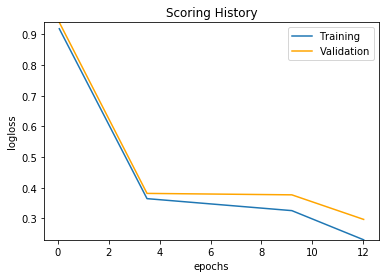

In [17]:
estimator_12epochs.plot()

In [18]:
estimator_12epochs.summary()


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 1,231,802 weights/biases, 14.2 MB, 423,733 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3802,Input,0,,,,,,,,,
1,,2,300,Rectifier,0,0,0,0.596211,0.469096,0,4.22597e-05,0.0250911,-0.326746,0.220353
2,,3,300,Rectifier,0,0,0,0.277104,0.321831,0,-0.00708742,0.0851088,-0.0519008,0.421497
3,,4,2,Softmax,,0,0,0.031617,0.0805843,0,0.00154859,0.265759,0.00241336,1.01433


In [21]:
# Find cardinality of attributes
# 0 indicates its a number
# non-zero indicates enum with different values

# below we see that one attribute has 3501 enum values
train.nlevels()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 3501,
 0,
 0,
 0,
 0,
 0,
 132,
 134,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2]

In [22]:
# this gives the different values of attribute
train.structure()

H2OFrame: 'py_2_sid_8edc' 
Dimensions: 35257 obs. of 31 variables
$ Year              :  num 1987 1987 1987 1987 1987 1987 1987 1987 1987 1987
$ Month             :  num 10 10 10 10 10 10 10 10 10 10
$ DayofMonth        :  num 14 15 17 18 19 21 22 23 24 26
$ DayOfWeek         :  num 3 4 6 7 1 3 4 5 6 1
$ DepTime           :  num 741 729 741 729 749 728 728 731 744 735
$ CRSDepTime        :  num 730 730 730 730 730 730 730 730 730 730
$ ArrTime           :  num 912 903 918 847 922 848 852 902 908 904
$ CRSArrTime        :  num 849 849 849 849 849 849 849 849 849 849
$ UniqueCarrier     :  Factor w/ 10 level(s) "AA","CO","DL","HP","PI","PS","TW","UA","US","WN" 
$ FlightNum         :  num 1451 1451 1451 1451 1451 1451 1451 1451 1451 1451


$ TailNum           :  Factor w/ 3501 level(s) "-N912<0xE5>","-N913<0xE5>","-N918<0xE5>","-N919<0xE5>","-N920<0xE5>","-N922<0xE5>","-N923<0xE5>","-N924<0xE5>","-N925<0xE5>","-N926<0xE5>","-N927<0xE5>","-N928<0xE5>","-N934<0xE5>","-N936<0xE5>","-N955<0xE5>","-N958<0xE5>","-N959<0xE5>","-N965<0xE5>","-N967<0xE5>","-N970<0xE5>","-N991<0xE5>","0","000000","112","<0xE4>NKNO<0xE6>","EI-BWD","N055AA","N056AA","N057AA","N058AA","N059AA","N060AA","N061AA","N064AA","N066AA","N067AA","N068AA","N069AA","N070AA","N071AA","N073AA","N076AA","N077AA","N078AA","N079AA","N082AA","N084AA","N101<0xE4E6>","N102","N102UW","N103","N10323","N103DA","N103UW","N104","N104UW","N105","N105UW","N106DA","N106UW","N107UW","N108<0xE4E6>","N108DL","N108UW","N109UW","N110HM","N110UW","N111UW","N112DL","N112UW","N113<0xE4E6>","N113DA","N113UW","N114<0xE4E6>","N114UW","N115<0xE4E6>","N116<0xE4E6>","N116DL","N117<0xE4E6>","N117DL","N118<0xE4E6>","N118DL","N118UW","N119<0xE4E6>","N119DL","N119UW","N120<0xE4E6>","N120DL","N

$ ActualElapsedTime :  num 91 94 97 78 93 80 84 91 84 89
$ CRSElapsedTime    :  num 79 79 79 79 79 79 79 79 79 79
$ AirTime           :  num nan nan nan nan nan nan nan nan nan nan
$ ArrDelay          :  num 23 14 29 -2 33 -1 3 13 19 15
$ DepDelay          :  num 11 -1 11 -1 19 -2 -2 1 14 5
$ Origin            :  Factor w/ 132 level(s) "ABE","ABQ","ACY","ALB","AMA","ANC","ATL","AUS","AVP","BDL","BGM","BHM","BIL","BNA","BOI","BOS","BTV","BUF","BUR","BWI","CAE","CHO","CHS","CLE","CLT","CMH","COS","CRP","CRW","CVG","DAL","DAY","DCA","DEN","DFW","DSM","DTW","EGE","ELP","ERI","EWR","EYW","FLL","GEG","GNV","GRR","GSO","HNL","HOU","HPN","HRL","IAD","IAH","ICT","IND","ISP","JAN","JAX","JFK","KOA","LAN","LAS","LAX","LBB","LEX","LGA","LIH","LIT","LYH","MAF","MCI","MCO","MDT","MDW","MEM","MFR","MHT","MIA","MKE","MLB","MRY","MSP","MSY","MYR","OAK","OGG","OKC","OMA","ONT","ORD","ORF","PBI","PDX","PHF","PHL","PHX","PIT","PSP","PVD","PWM","RDU","RIC","RNO","ROA","ROC","RSW","SAN","SAT","SAV","SBN","S

In [30]:
# let's remove the TailNum attribute since it has maximum cardinality and does not add much to model
x_lean = list (filter (lambda v: v!='TailNum', xAll))

### Fine Tune 3 - Same as above but with lesser attributes

In [31]:
estimator_12epochs_lean = H2ODeepLearningEstimator(
    epochs = 12,
    hidden=[300,300],
    stopping_rounds = 3,
    stopping_tolerance = 0,
    stopping_metric = 'logloss')
estimator_12epochs_lean.train(x_lean,y,train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [32]:
perf_12epochs_lean = estimator_12epochs_lean.model_performance(test)
print (perf_12epochs_lean.logloss)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.08520686541684251
RMSE: 0.2919021504148993
LogLoss: 0.2667001361857582
Mean Per-Class Error: 0.11843956599359262
AUC: 0.9569471390956298
AUCPR: 0.9677354173464143
Gini: 0.9138942781912596

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3735006753554746: 


,,NO,YES,Error,Rate
0,NO,1748.0,263.0,0.1308,(263.0/2011.0)
1,YES,263.0,2177.0,0.1078,(263.0/2440.0)
2,Total,2011.0,2440.0,0.1182,(526.0/4451.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.373501,0.892213,219.0
1,max f2,0.091029,0.925238,335.0
2,max f0point5,0.779225,0.917822,95.0
3,max accuracy,0.385763,0.881824,215.0
4,max precision,0.999988,1.000000,0.0
5,max recall,0.006100,1.000000,392.0
6,max specificity,0.999988,1.000000,0.0
7,max absolute_mcc,0.410094,0.761677,207.0
8,max min_per_class_accuracy,0.410094,0.881154,207.0
9,max mean_per_class_accuracy,0.410094,0.881560,207.0



Gains/Lift Table: Avg response rate: 54.82 %, avg score: 52.76 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.014154,1.000000,1.824180,1.824180,1.000000,1.000000,1.000000,1.000000,0.025820,0.025820,82.418033,82.418033
1,,2,0.020220,1.000000,1.824180,1.824180,1.000000,1.000000,1.000000,1.000000,0.011066,0.036885,82.418033,82.418033
2,,3,0.030106,1.000000,1.824180,1.824180,1.000000,1.000000,1.000000,1.000000,0.018033,0.054918,82.418033,82.418033
3,,4,0.040216,1.000000,1.824180,1.824180,1.000000,1.000000,1.000000,1.000000,0.018443,0.073361,82.418033,82.418033
4,,5,0.050101,1.000000,1.824180,1.824180,1.000000,1.000000,1.000000,1.000000,0.018033,0.091393,82.418033,82.418033
5,,6,0.100202,1.000000,1.824180,1.824180,1.000000,1.000000,1.000000,1.000000,0.091393,0.182787,82.418033,82.418033
6,,7,0.150079,0.999999,1.824180,1.824180,1.000000,1.000000,1.000000,1.000000,0.090984,0.273770,82.418033,82.418033
7,,8,0.200180,0.999958,1.824180,1.824180,1.000000,0.999989,1.000000,0.999997,0.091393,0.365164,82.418033,82.418033
8,,9,0.300157,0.993379,1.815982,1.821450,0.995506,0.998555,0.998503,0.999517,0.181557,0.546721,81.598176,82.144952
9,,10,0.400135,0.864888,1.680705,1.786283,0.921348,0.949415,0.979225,0.986999,0.168033,0.714754,68.070547,78.628326



<bound method MetricsBase.logloss of >


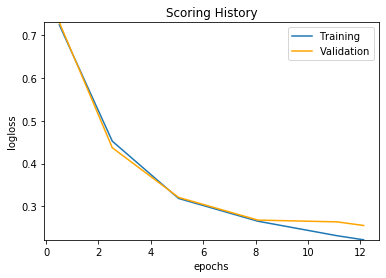

In [33]:
estimator_12epochs_lean.plot()

In [34]:
estimator_12epochs_lean.summary()


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 181,202 weights/biases, 2.1 MB, 427,708 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,300,Input,0,,,,,,,,,
1,,2,300,Rectifier,0,0,0,0.190098,0.387046,0,-0.000433379,0.0664334,-0.246318,0.11578
2,,3,300,Rectifier,0,0,0,0.205879,0.260364,0,-0.0161279,0.0943373,0.126573,0.416567
3,,4,2,Softmax,,0,0,0.0524526,0.143533,0,0.00605838,0.269569,0.0132534,0.434183


### Fine Tune 4 - Final Model - More Epochs and More Neurons

In [41]:
estimator_24epochs_lean = H2ODeepLearningEstimator(
    epochs = 24,
    hidden=[400,400,400],
    stopping_rounds = 3,
    stopping_tolerance = 0,
    stopping_metric = 'logloss')
estimator_24epochs_lean.train(x_lean,y,train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [43]:
perf_24epochs_lean = estimator_24epochs_lean.model_performance(test)
print (perf_24epochs_lean.logloss)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.07927182359858886
RMSE: 0.28155252369422806
LogLoss: 0.254333123371653
Mean Per-Class Error: 0.10628663253743753
AUC: 0.9643215389130275
AUCPR: 0.9724244307068773
Gini: 0.928643077826055

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3196813902449708: 


,,NO,YES,Error,Rate
0,NO,1730.0,281.0,0.1397,(281.0/2011.0)
1,YES,213.0,2227.0,0.0873,(213.0/2440.0)
2,Total,1943.0,2508.0,0.111,(494.0/4451.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.319681,0.900162,250.0
1,max f2,0.092398,0.932237,334.0
2,max f0point5,0.711955,0.923622,123.0
3,max accuracy,0.448886,0.892384,203.0
4,max precision,0.982146,0.999323,16.0
5,max recall,0.002047,1.000000,395.0
6,max specificity,0.999995,0.999503,0.0
7,max absolute_mcc,0.448886,0.784677,203.0
8,max min_per_class_accuracy,0.403697,0.890104,217.0
9,max mean_per_class_accuracy,0.448886,0.893713,203.0



Gains/Lift Table: Avg response rate: 54.82 %, avg score: 51.65 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.048978,1.000000e+00,1.824180,1.824180,1.000000,1.000000,1.000000,1.000000,0.089344,0.089344,82.418033,82.418033
1,,2,0.053471,1.000000e+00,1.824180,1.824180,1.000000,1.000000,1.000000,1.000000,0.008197,0.097541,82.418033,82.418033
2,,3,0.100202,1.000000e+00,1.824180,1.824180,1.000000,1.000000,1.000000,1.000000,0.085246,0.182787,82.418033,82.418033
3,,4,0.150079,1.000000e+00,1.824180,1.824180,1.000000,1.000000,1.000000,1.000000,0.090984,0.273770,82.418033,82.418033
4,,5,0.200180,9.999988e-01,1.816000,1.822133,0.995516,1.000000,0.998878,1.000000,0.090984,0.364754,81.600015,82.213299
5,,6,0.300157,9.959090e-01,1.824180,1.822815,1.000000,0.999350,0.999251,0.999784,0.182377,0.547131,82.418033,82.281492
6,,7,0.400135,8.714837e-01,1.701202,1.792429,0.932584,0.952601,0.982594,0.987995,0.170082,0.717213,70.120188,79.242873
7,,8,0.500112,5.235795e-01,1.336366,1.701257,0.732584,0.708874,0.932615,0.932195,0.133607,0.850820,33.636581,70.125713
8,,9,0.600090,2.124369e-01,0.873147,1.563290,0.478652,0.364277,0.856982,0.837578,0.087295,0.938115,-12.685301,56.329044
9,,10,0.700067,4.954567e-02,0.442722,1.403261,0.242697,0.114525,0.769255,0.734318,0.044262,0.982377,-55.727758,40.326067



<bound method MetricsBase.logloss of >


In [44]:
estimator_24epochs_lean.summary()


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 442,002 weights/biases, 5.1 MB, 853,177 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,300,Input,0,,,,,,,,,
1,,2,400,Rectifier,0,0,0,0.041686,0.137254,0,-0.00254778,0.0923854,0.0839807,0.199926
2,,3,400,Rectifier,0,0,0,0.049425,0.0560002,0,-0.0227178,0.0617192,0.802929,0.140766
3,,4,400,Rectifier,0,0,0,0.138199,0.203696,0,0.000245,0.057105,-0.285669,0.212428
4,,5,2,Softmax,,0,0,0.0221376,0.0944095,0,-0.0118089,0.203053,0.00856637,0.21149


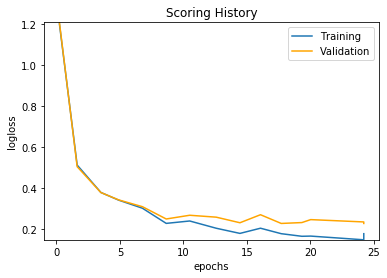

In [45]:
estimator_24epochs_lean.plot()